# NELDER-MEAD METHOD

## 2-D Implementation

In [ ]:
import numpy as np


def sort_state(state, fun):
    xs = np.array([state["best"], state["lousy"], state["worst"]])
    fs = np.array([fun(xs[0]), fun(xs[1]), fun(xs[2])])
    ind = np.argsort(fs)
    state["best"] = xs[ind[0]]
    state["lousy"] = xs[ind[1]]
    state["worst"] = xs[ind[2]]

    return state


def shrink(state, fun):
    state["lousy"] = 0.5 * (state["best"] + state["lousy"])
    state["worst"] = 0.5 * (state["best"] + state["worst"])

    return sort_state(state, fun)


def nelder_mead2d(fun, x1, x2, x3,
                   const_x_R = 2, const_x_E = 3,
                     eps_step = 0.01, eps_fun = 0.01,n_iter = 10):

    states = []

    # Assign classes to the initial 3 points
    state = {"best": x1, "lousy": x2, "worst": x3}
    state = sort_state(state, fun)
    
    # Apply Nelder-Mead iterations
    for i in range(n_iter):

        # Save each state
        #print(states)
        states.append(state.copy())

        # Calculate XR and XE
        x_average = 0.5 * (state["best"] + state["lousy"])
        x_R =  state["worst"] + const_x_R * (x_average - state["worst"])
        x_E = state["worst"] +  const_x_E * (x_average - state["worst"])
        
        # Condition 1
        y_R = fun(x_R)
        y_E = fun(x_E)
        if y_R < fun(state["best"]):
            # Update with x_E or x_R
            state["worst"] = state["lousy"]
            state["lousy"] = state["best"]
            if y_E < y_R:
                state["best"] = x_E

            else:
                state["best"] = x_R

        # Condition 2
        elif y_R < fun(state["lousy"]):
            state["worst"] = state["lousy"]
            state["lousy"] = x_R
        
        # Condition 3
        elif y_R < fun(state["worst"]):
            x_oc = state["worst"] + 3/2 * (x_average - state["worst"])
            y_oc = fun(x_oc)
            if y_oc < y_R:
                state["worst"] = x_oc

            # Else shrink
            else:   
                state = shrink(state, fun)

        # Condition 4
        else:
            x_ic = state["worst"] + 1/2 * (x_average - state["worst"])
            y_ic = fun(x_ic)
            if y_ic < fun(state["worst"]):
                state["worst"] = x_ic
            else:
                state = shrink(state, fun)


        # Convergence
        max_len = np.max([np.linalg.norm(state["best"] - state["worst"]),
                          np.linalg.norm(state["lousy"] - state["worst"]),
                          np.linalg.norm(state["best"] - state["lousy"])])
        
        fun_dif = fun(state["best"]) - fun(state["worst"])
        if (fun_dif < eps_fun and max_len < eps_step):
            print(i)
            return states

    return states


### Test on a simple 2-d function

66
{'best': array([-9.2446804e-05, -1.8030405e-03]), 'lousy': array([-0.0006762, -0.0020687]), 'worst': array([-0.00117213, -0.00147755])}


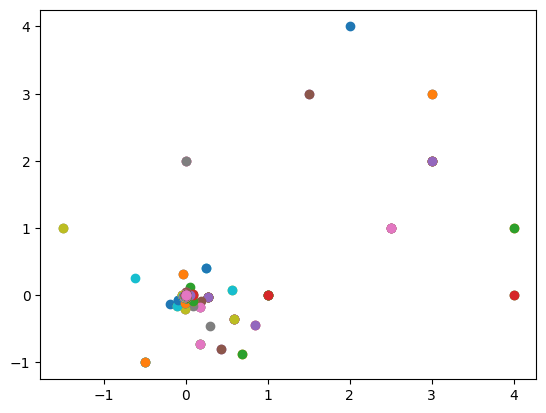

In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2 + x[1]**2

states = nelder_mead2d(f, [3,2], [2,4], [3,3], n_iter=400, eps_fun=0.001, eps_step=0.001)

alpha = 1
for state in states:
    plt.scatter([state["best"][0], state["lousy"][0], state["worst"][0]],[state["best"][1], state["lousy"][1], state["worst"][1]], alpha=alpha)
    
print(state)

## Generalized to arbitrary dimensions

In [ ]:
def nelder_mead()

In [108]:
# Function 1
def f1(x):
    return (x[0] - x[2])**2 + (2*x[1] + x[2])**2 + (4*x[0] - 2*x[1] + x[2])**2 + x[0] + x[1]

# Function 2 
def f2(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2 + 100* (x[1] - x[0]**2)**2 + 100* (x[2] - x[1]**2)**2

# Function 3
def f3(x):
    return (1.5 - x[0] + x[0] * x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0] * x[1]**3)**2


In [109]:
states = nelder_mead2d(f3, [1,1], [1,2], [2,1], n_iter=100000, eps_fun=0.0001, eps_step=0.001)

f3(states[-1]["best"]) 

61


np.float64(3.800444138883904e-07)